# Demo 1: Basic usage
This notebook contains a demonstration of a common usage of h-NNE to project data to two dimensions. The data is plotted with both the target labels and labels from the h-NNE hierarchy. As a dataset we selected the train and test splits of CIFAR-10. In the end we also perform a projection of the test data using the h-NNE structure built on the train data.

In [1]:
import matplotlib.pyplot as plt
from torchvision.datasets import CIFAR10

from hnne import HNNE

## CIFAR-10 test dataset
10000 examples of 32x32 RGB images

### Download and load the data

In [2]:
cifar10_test = CIFAR10(root='.', download=True, train=False)

Files already downloaded and verified


In [3]:
cifar10_test_data = cifar10_test.data.reshape((len(cifar10_test.data), -1))
cifar10_test_data.shape

(10000, 3072)

### Project to 2 dimensions with h-NNE

In [4]:
%%time
hnne_cifar10_test = HNNE()
cifar10_test_projection_2d = hnne_cifar10_test.fit_transform(cifar10_test_data)

CPU times: user 19.7 s, sys: 4.38 s, total: 24.1 s
Wall time: 8.1 s


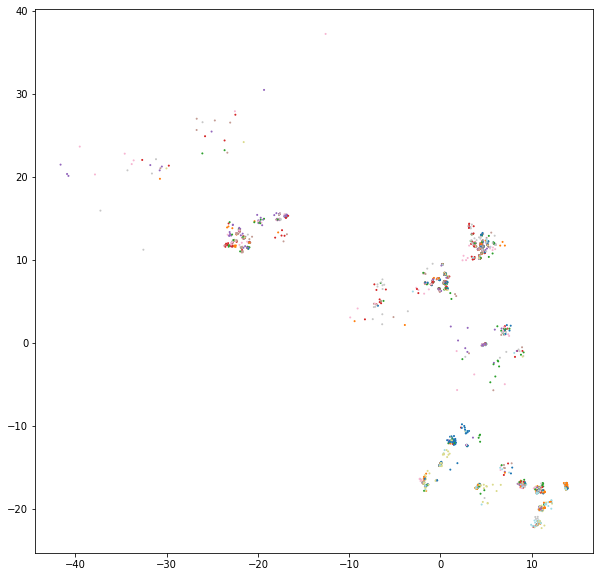

In [5]:
plt.figure(figsize=(10, 10))
plt.scatter(*cifar10_test_projection_2d.T, s=1, c=cifar10_test.targets, cmap='tab20')
plt.show()

## Visualize with colors based on partitions defined from the h-NNE hierarchy levels
h-NNE is inspired by the FINCH clustering and has the nice property that during the construction of the hierarchy which defines the projection, multiple partitions of the data are formed, from very grobe to more granular. Those partitions can be used to get produce some clusters on the data and are particularly useful in cases where no labels are available.

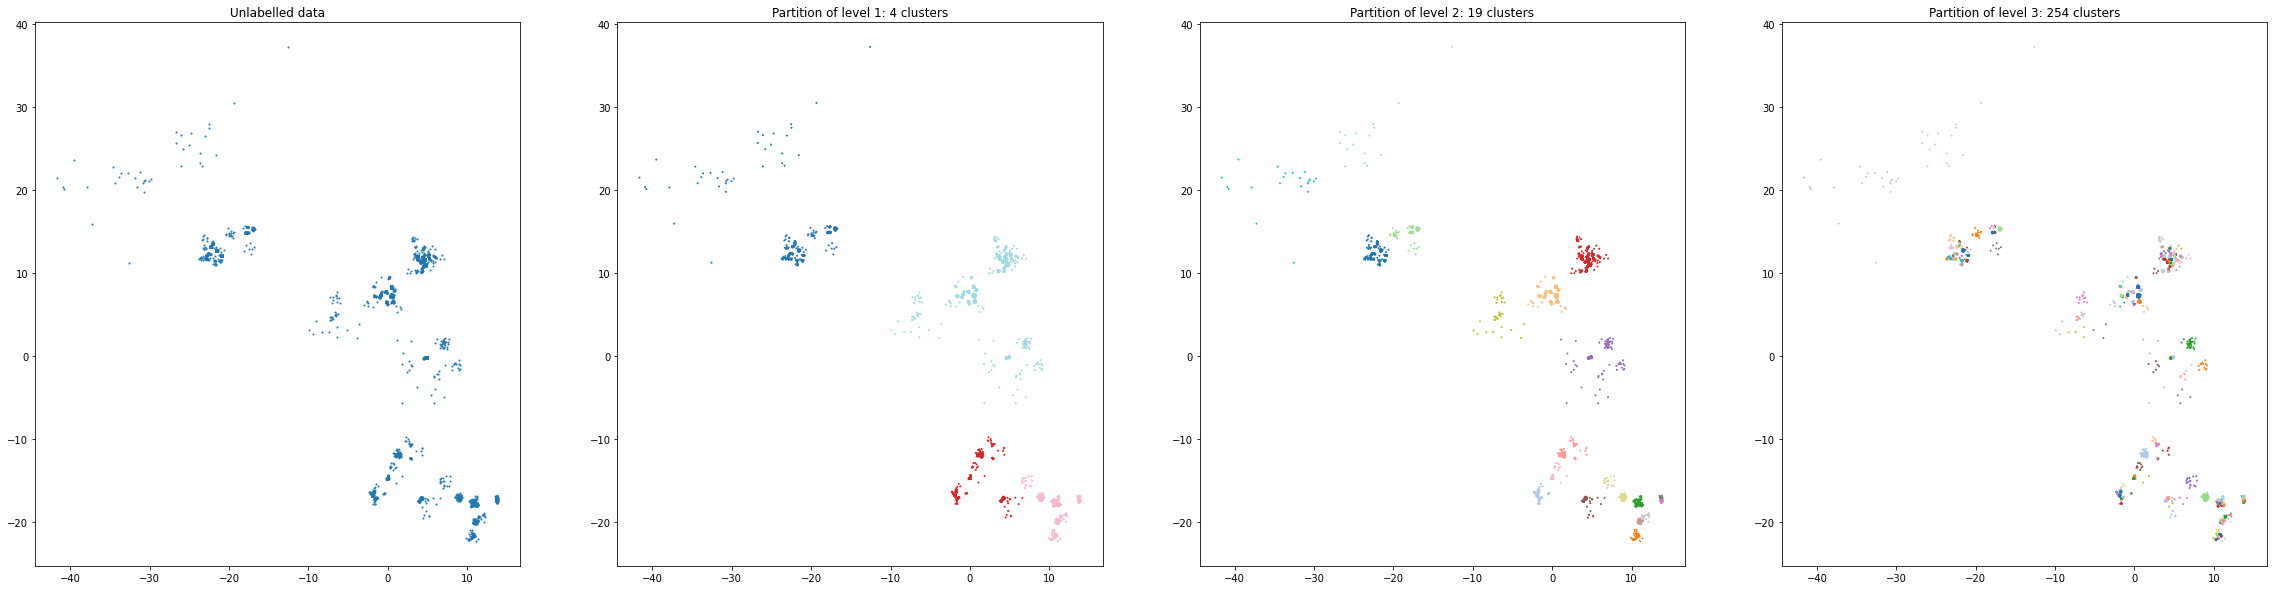

In [22]:
partitions = hnne_cifar10_test.hierarchy_parameters.partitions
partition_sizes = hnne_cifar10_test.hierarchy_parameters.partition_sizes
number_of_levels = partitions.shape[1]

_, ax = plt.subplots(1, number_of_levels + 1, figsize=(10*(number_of_levels + 1), 10))

ax[0].set_title('Unlabelled data')
ax[0].scatter(*cifar10_test_projection_2d.T, s=1)

for i in range(1, number_of_levels + 1):
    partition_idx = number_of_levels - i
    ax[i].set_title(f'Partition of level {i}: {partition_sizes[partition_idx]} clusters')
    ax[i].scatter(*cifar10_test_projection_2d.T, s=1, c=partitions[:, partition_idx], cmap='tab20')
plt.show()

## Try it on larger amount of data: CIFAR-10 train
50000 examples of 32x32 RGB images

In [26]:
cifar10_train = CIFAR10(root='.', download=True, train=True)

Files already downloaded and verified


In [27]:
cifar10_train_data = cifar10_train.data.reshape((len(cifar10_train.data), -1))
cifar10_train_data.shape

(50000, 3072)

In [28]:
%%time
hnne_cifar10_train = HNNE()
cifar10_train_projection_2d = hnne_cifar10_train.fit_transform(cifar10_train_data, verbose=True)

Building h-NNE hierarchy using FINCH...
Using PyNNDescent to compute 1st-neighbours at this step ...
Mon Mar 14 13:03:29 2022 Building RP forest with 20 trees
Mon Mar 14 13:03:51 2022 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	 5  /  16
	Stopping threshold met -- exiting after 5 iterations
Step PyNNDescent done ...
Level 0: 2264 clusters
Level 1: 121 clusters
Level 2: 18 clusters
Level 3: 6 clusters
Level 4: 2 clusters
Removing 1 levels from the top to start with a levelof size at least 3.
Projecting to 2 dimensions...
[2264, 121, 18, 6]
CPU times: user 2min 18s, sys: 22.1 s, total: 2min 40s
Wall time: 1min 42s


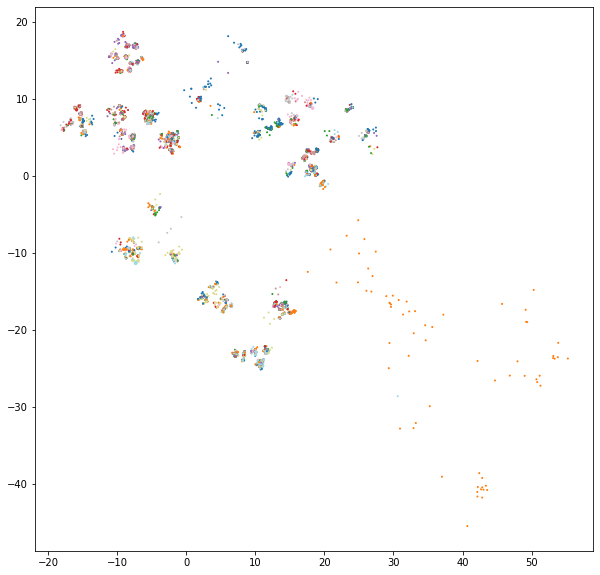

In [30]:
plt.figure(figsize=(10, 10))
plt.scatter(*cifar10_train_projection_2d.T, s=1, c=cifar10_train.targets, cmap='tab20')
plt.show()

## Project new points
Using the projection generated from the CIFAR-10 training set, we project the CIFAR-10 testing set

In [31]:
%%time
cifar10_test_projection_2d_as_new_data = hnne_cifar10_train.transform(cifar10_test_data)

CPU times: user 9.57 s, sys: 1.59 s, total: 11.2 s
Wall time: 4.6 s


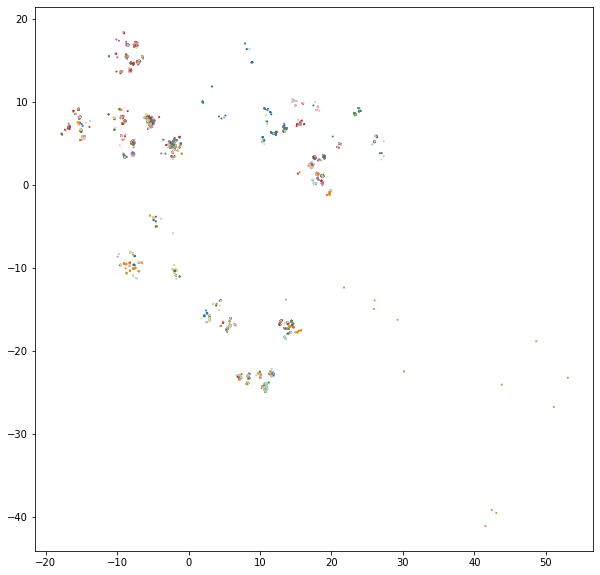

In [32]:
plt.figure(figsize=(10, 10))
plt.scatter(*cifar10_test_projection_2d_as_new_data.T, s=1, c=cifar10_test.targets, cmap='tab20')
plt.show()